XGBoost Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Đọc dữ liệu từ file CSV
dataset_path = '/content/Problem3.csv'
data_df = pd.read_csv(dataset_path)

data_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,4.468204,26.2,94.3,1.808289,8.2,51,6.7,False,0.000000
1,7,4,oct,tue,4.517431,35.4,669.1,2.041220,18.0,33,0.9,False,0.000000
2,7,4,oct,sat,4.517431,43.7,686.9,2.041220,14.6,33,1.3,False,0.000000
3,8,6,mar,fri,4.529368,33.3,77.5,2.302585,8.3,97,4.0,True,0.000000
4,8,6,mar,sun,4.503137,51.3,102.2,2.360854,11.4,99,1.8,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4,3,aug,sun,4.414010,56.7,665.6,1.064711,27.8,32,2.7,False,2.006871
506,2,4,aug,sun,4.414010,56.7,665.6,1.064711,21.9,71,5.8,False,4.012592
507,7,4,aug,sun,4.414010,56.7,665.6,1.064711,21.2,70,6.7,False,2.498152
508,1,4,aug,sat,4.558079,146.0,614.7,2.509599,25.6,42,4.0,False,0.000000


In [3]:
categorical_cols = data_df.select_dtypes(include=['object', 'bool']).columns.to_list()
for col_name in categorical_cols:
    n_categories = data_df[col_name].nunique()
    print(f'Number of categories in {col_name}: {n_categories}')
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(data_df[categorical_cols])
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols,
    columns=categorical_cols
)
numerical_df = data_df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)


Number of categories in month: 12
Number of categories in day: 7
Number of categories in rain: 2


In [4]:
print(encoded_df.head())

   X  Y      FFMC   DMC     DC       ISI  temp  RH  wind  area  month  day  \
0  7  5  4.468204  26.2   94.3  1.808289   8.2  51   6.7   0.0    7.0  0.0   
1  7  4  4.517431  35.4  669.1  2.041220  18.0  33   0.9   0.0   10.0  5.0   
2  7  4  4.517431  43.7  686.9  2.041220  14.6  33   1.3   0.0   10.0  2.0   
3  8  6  4.529368  33.3   77.5  2.302585   8.3  97   4.0   0.0    7.0  0.0   
4  8  6  4.503137  51.3  102.2  2.360854  11.4  99   1.8   0.0    7.0  3.0   

   rain  
0   0.0  
1   0.0  
2   0.0  
3   1.0  
4   0.0  


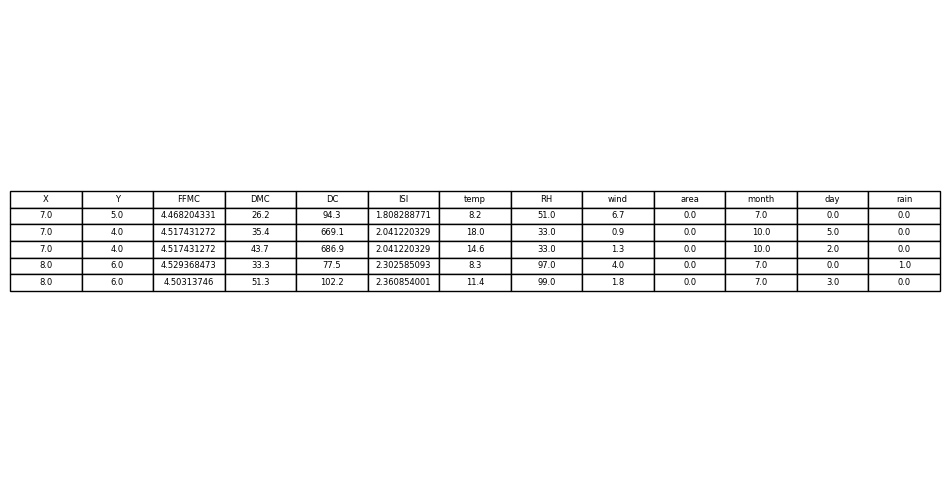

In [5]:
# Hiển thị DataFrame với các cột
fig, ax = plt.subplots(figsize=(12, 6))  # Điều chỉnh kích thước nếu cần
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=encoded_df.head().values, colLabels=encoded_df.columns, cellLoc='center', loc='center')

plt.show()

In [7]:
X = encoded_df.drop(columns=['area'])
y = encoded_df['area']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print("Training data shape: ", X_train.shape, y_train.shape)
print("Testing data shape: ", X_test.shape, y_test.shape)

Training data shape:  (357, 12) (357,)
Testing data shape:  (153, 12) (153,)


In [9]:
xg_reg = xgb.XGBRegressor(
    seed=7,
    learning_rate=0.01,
    n_estimators=102,
    max_depth=3
)

xg_reg.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [10]:
preds = xg_reg.predict(X_test)

print("Predictions on test data: ", preds[:5])

Predictions on test data:  [1.0842953 1.1191528 0.8486002 2.0224624 1.2788543]


In [11]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

print('Evaluation results on test set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on test set:
Mean Absolute Error: 1.1484401341167767
Mean Squared Error: 1.8845074196256495
